In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy.stats import norm,mode
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv(r'E:/数据分析数据集/job.csv',header=None,names=['position','address','company','salary','diploma','experience','lables'])

In [4]:
df.head()

,position,address,company,salary,diploma,experience,lables
0,数据分析,北京·朝阳区·亚运村,中信百信银行,25-40K·15薪,本科,5-10年,银行
1,数据分析,北京·朝阳区·太阳宫,BOSS直聘,25-40K·16薪,博士,1-3年,人力资源服务
2,数据分析,北京·朝阳区·鸟巢,京东集团,50-80K·14薪,本科,3-5年,电子商务
3,数据分析,北京·海淀区·清河,一亩田,15-25K,本科,3-5年,O2O
4,数据分析岗,北京·海淀区·西北旺,建信金科,20-40K·14薪,硕士,5-10年,银行


In [6]:
df.shape

(3045, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045 entries, 0 to 3044
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   position    3045 non-null   object
 1   address     3045 non-null   object
 2   company     3045 non-null   object
 3   salary      3045 non-null   object
 4   diploma     3045 non-null   object
 5   experience  3045 non-null   object
 6   lables      3045 non-null   object
dtypes: object(7)
memory usage: 166.6+ KB


In [8]:
df.duplicated().sum()

45

In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(3000, 7)

In [12]:
df.isnull().sum()

position      0
address       0
company       0
salary        0
diploma       0
experience    0
lables        0
dtype: int64

In [13]:
x = df['position'].str.contains('实习')
df = df[~x]
df

,position,address,company,salary,diploma,experience,lables
0,数据分析,北京·朝阳区·亚运村,中信百信银行,25-40K·15薪,本科,5-10年,银行
1,数据分析,北京·朝阳区·太阳宫,BOSS直聘,25-40K·16薪,博士,1-3年,人力资源服务
2,数据分析,北京·朝阳区·鸟巢,京东集团,50-80K·14薪,本科,3-5年,电子商务
3,数据分析,北京·海淀区·清河,一亩田,15-25K,本科,3-5年,O2O
4,数据分析岗,北京·海淀区·西北旺,建信金科,20-40K·14薪,硕士,5-10年,银行
...,...,...,...,...,...,...,...
3040,助理数据分析员,南京·建邺区·雨润大街,万得,4-6K,本科,经验不限,数据服务
3041,数据分析师（经济）,南京·建邺区·奥体,万得,4-6K,本科,经验不限,数据服务
3042,（金融）数据分析员,南京·建邺区·奥体,万得,4-6K,本科,经验不限,数据服务
3043,数据分析员,南京·建邺区·奥体,万得,4-6K,本科,1年以内,数据服务


In [14]:
df.shape

(2926, 7)

In [15]:
df.reset_index(drop=True,inplace=True)

In [16]:
df['address'] = df['address'].str[:2]

In [17]:
df.address.unique()

array(['北京', '上海', '广州', '深圳', '杭州', '天津', '苏州', '武汉', '厦门', '长沙', '成都',
       '郑州', '重庆', '青岛', '南京'], dtype=object)

In [18]:
df['salary'].unique()

array(['25-40K·15薪', '25-40K·16薪', '50-80K·14薪', '15-25K', '20-40K·14薪',
       '15-30K·14薪', '20-30K', '15-25K·14薪', '40-55K·13薪', '20-35K',
       '30-55K·13薪', '20-40K·16薪', '35-40K·15薪', '45-65K', '15-30K',
       '25-50K·14薪', '25-35K·14薪', '15-25K·16薪', '15-28K·14薪', '18-28K',
       '30-50K·13薪', '20-35K·14薪', '15-28K', '20-30K·13薪', '30-50K·16薪',
       '18-30K·14薪', '18-22K·15薪', '25-45K·16薪', '13-25K', '14-25K·14薪',
       '18-35K·14薪', '25-45K·14薪', '25-40K', '15-26K·13薪', '12-24K',
       '25-45K', '20-40K', '20-30K·15薪', '15-25K·15薪', '25-40K·17薪',
       '20-30K·14薪', '18-35K', '18-27K', '30-45K', '20-40K·15薪',
       '20-30K·16薪', '25-30K·15薪', '17-27K', '28-50K·14薪', '25-35K',
       '30-60K·14薪', '30-55K', '35-60K·14薪', '15-22K', '30-50K',
       '30-50K·14薪', '40-70K', '30-60K·13薪', '25-50K·15薪', '13-26K·16薪',
       '25-50K', '12-24K·14薪', '17-25K·15薪', '18-25K·15薪', '28-40K·16薪',
       '30-40K', '28-40K·13薪', '20-25K·16薪', '30-60K·16薪', '25-30K·14薪',
       '15-30K

### 将薪资列的值进行拆分，新增bottom，top两列，作为一个薪资的最低值和最高值

In [19]:
df['bottom']=df['salary'].str.extract('^(\d+).*')

In [20]:
df['top']=df['salary'].str.extract('^.*?-(\d+).*')

In [21]:
df['top'].fillna(df['bottom'],inplace=True)

In [22]:
df

,position,address,company,salary,diploma,experience,lables,bottom,top
0,数据分析,北京,中信百信银行,25-40K·15薪,本科,5-10年,银行,25,40
1,数据分析,北京,BOSS直聘,25-40K·16薪,博士,1-3年,人力资源服务,25,40
2,数据分析,北京,京东集团,50-80K·14薪,本科,3-5年,电子商务,50,80
3,数据分析,北京,一亩田,15-25K,本科,3-5年,O2O,15,25
4,数据分析岗,北京,建信金科,20-40K·14薪,硕士,5-10年,银行,20,40
...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,本科,经验不限,数据服务,4,6
2922,数据分析师（经济）,南京,万得,4-6K,本科,经验不限,数据服务,4,6
2923,（金融）数据分析员,南京,万得,4-6K,本科,经验不限,数据服务,4,6
2924,数据分析员,南京,万得,4-6K,本科,1年以内,数据服务,4,6


### 有些公司有标明年终奖，如14薪等，故新增一列commission_pct作为奖金率，并计算每个岗位的奖金率

In [23]:
df['commision_pct']=df['salary'].str.extract('^.*?.(\d{2})薪')
df['commision_pct'].fillna(12,inplace=True)
df['commision_pct']=df['commision_pct'].astype('float64')
df['commision_pct']=df['commision_pct']/12

In [24]:
df['bottom']=df['bottom'].astype('int64')
df['top']=df['top'].astype('int64')
df['avg_salary']=(df['bottom']+df['top']/2*df['commision_pct'])
df['avg_salary']=df['avg_salary'].astype('int64')

In [25]:
df.head()

,position,address,company,salary,diploma,experience,lables,bottom,top,commision_pct,avg_salary
0,数据分析,北京,中信百信银行,25-40K·15薪,本科,5-10年,银行,25,40,1.250000,50
1,数据分析,北京,BOSS直聘,25-40K·16薪,博士,1-3年,人力资源服务,25,40,1.333333,51
2,数据分析,北京,京东集团,50-80K·14薪,本科,3-5年,电子商务,50,80,1.166667,96
3,数据分析,北京,一亩田,15-25K,本科,3-5年,O2O,15,25,1.000000,27
4,数据分析岗,北京,建信金科,20-40K·14薪,硕士,5-10年,银行,20,40,1.166667,43


In [26]:
cols=list(df)

In [27]:
cols

['position',
 'address',
 'company',
 'salary',
 'diploma',
 'experience',
 'lables',
 'bottom',
 'top',
 'commision_pct',
 'avg_salary']

In [28]:
cols.insert(4,cols.pop(cols.index('bottom')))
cols.insert(5,cols.pop(cols.index('top')))
cols.insert(6,cols.pop(cols.index('commision_pct')))
cols.insert(7,cols.pop(cols.index('avg_salary')))
df=df.loc[:,cols]
df

,position,address,company,salary,bottom,top,commision_pct,avg_salary,diploma,experience,lables
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,50,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,51,博士,1-3年,人力资源服务
2,数据分析,北京,京东集团,50-80K·14薪,50,80,1.166667,96,本科,3-5年,电子商务
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,27,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,43,硕士,5-10年,银行
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,7,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,7,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,7,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.000000,7,本科,1年以内,数据服务


In [29]:
df.describe()

,bottom,top,commision_pct,avg_salary
count,2926.000000,2926.000000,2926.000000,2926.000000
mean,11.980861,20.058442,1.057929,22.595694
std,7.841004,13.824406,0.100427,15.674452
min,1.000000,3.000000,1.000000,3.000000
25%,6.000000,9.000000,1.000000,10.000000
50%,10.000000,15.000000,1.000000,18.000000
75%,15.000000,30.000000,1.083333,30.000000
max,80.000000,110.000000,1.666667,144.000000


In [30]:
df=df[(df.avg_salary>2)&(df.avg_salary<55)]

In [31]:
df['diploma'].unique()

array(['本科', '博士', '硕士', '不限', '大专', '高中', '中技'], dtype=object)

In [32]:
df['experience'].unique()

array(['5-10年', '1-3年', '3-5年', '经验不限', '5-10年学历', '3-5年学历', '经验不限学历',
       '在校/应届', '1-3年学历', '1年以内', '10年以上', '1年以内学历', '1-3年中专/', '经验不限中专/',
       '1年以内中专/'], dtype=object)

In [33]:
df['experience'].replace('5-10年学历','5-10年',inplace=True)
df['experience'].replace('3-5年学历','3-5年',inplace=True)
df['experience'].replace('经验不限学历','经验不限',inplace=True)
df['experience'].replace('1-3年学历','1-3年',inplace=True)
df['experience'].replace('1年以内学历','1年以内',inplace=True)
df['experience'].replace('经验不限中专/','经验不限',inplace=True)
df['experience'].replace('1年以内中专/','1年以内',inplace=True)
df['experience'].replace('1-3年中专/','1-3年',inplace=True)
df['experience'].unique()

array(['5-10年', '1-3年', '3-5年', '经验不限', '在校/应届', '1年以内', '10年以上'],
      dtype=object)

In [34]:
df['diploma'].unique()

array(['本科', '博士', '硕士', '不限', '大专', '高中', '中技'], dtype=object)

In [35]:
df['diploma'].value_counts()

本科    2085
大专     489
硕士     131
不限      74
中技      10
高中       8
博士       4
Name: diploma, dtype: int64

In [36]:
pd.set_option('max_row',100)

In [37]:
df

,position,address,company,salary,bottom,top,commision_pct,avg_salary,diploma,experience,lables
0,数据分析,北京,中信百信银行,25-40K·15薪,25,40,1.250000,50,本科,5-10年,银行
1,数据分析,北京,BOSS直聘,25-40K·16薪,25,40,1.333333,51,博士,1-3年,人力资源服务
3,数据分析,北京,一亩田,15-25K,15,25,1.000000,27,本科,3-5年,O2O
4,数据分析岗,北京,建信金科,20-40K·14薪,20,40,1.166667,43,硕士,5-10年,银行
5,数据分析,北京,北京新氧万维,15-30K·14薪,15,30,1.166667,32,本科,1-3年,互联网
...,...,...,...,...,...,...,...,...,...,...,...
2921,助理数据分析员,南京,万得,4-6K,4,6,1.000000,7,本科,经验不限,数据服务
2922,数据分析师（经济）,南京,万得,4-6K,4,6,1.000000,7,本科,经验不限,数据服务
2923,（金融）数据分析员,南京,万得,4-6K,4,6,1.000000,7,本科,经验不限,数据服务
2924,数据分析员,南京,万得,4-6K,4,6,1.000000,7,本科,1年以内,数据服务


In [38]:
df['lables'].value_counts()

互联网            693
计算机软件          278
移动互联网          254
电子商务           244
数据服务           111
互联网金融           87
游戏              78
在线教育            75
生活服务            72
医疗健康            68
O2O             64
贸易/进出口          52
其他行业            48
企业服务            46
银行              41
物流/仓储           38
通信/网络设备         30
信息安全            28
批发/零售           28
服装/纺织/皮革        25
环保              25
智能硬件            24
咨询              24
食品/饮料/烟酒        21
新零售             21
培训机构            20
广告营销            18
计算机服务           18
工程施工            15
社交网络            15
家具/家电/家居        15
人力资源服务          13
医疗/护理/卫生        13
广告/公关/会展        13
电子/半导体/集成电路     12
旅游               9
其他服务业            9
餐饮               9
交通/运输            9
汽车生产             9
证券/期货            8
制药               7
医疗设备/器械          7
机械设备/机电/重工       6
投资/融资            6
其他专业服务           6
仪器仪表/工业自动化       6
新能源              6
日化               6
文化/体育/娱乐         5
房地产开发            5
装修装饰             4
音乐/视频/阅读    

In [39]:
df.loc[~df['lables'].isin(['互联网','计算机软件','移动互联网','电子商务','数据服务',
                           '互联网金融','游戏','在线教育','生活服务','O2O','医疗健康','贸易/进出口','企业服务','银行']),'lables']='其他行业'

In [40]:
df['lables'].value_counts()

互联网       693
其他行业      638
计算机软件     278
移动互联网     254
电子商务      244
数据服务      111
互联网金融      87
游戏         78
在线教育       75
生活服务       72
医疗健康       68
O2O        64
贸易/进出口     52
企业服务       46
银行         41
Name: lables, dtype: int64

### 可视化及简要分析

<AxesSubplot:xlabel='address'>

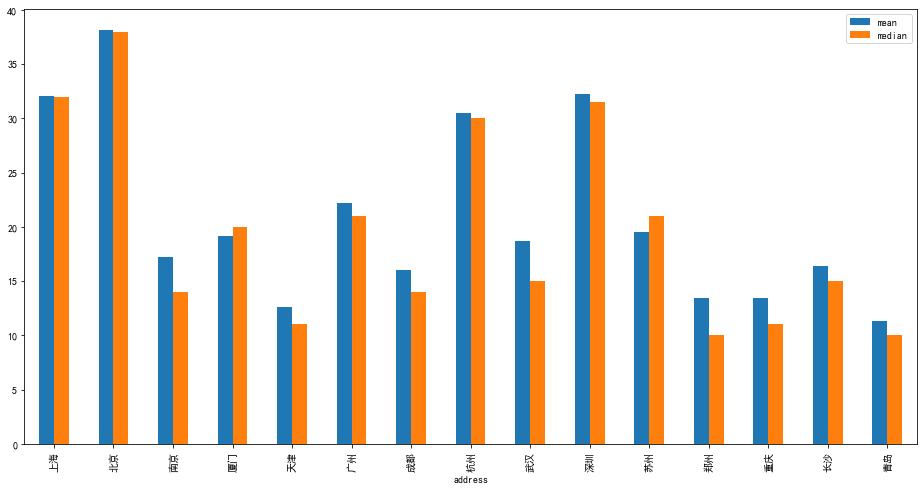

In [41]:
df.avg_salary.groupby(df['address']).agg(['mean','median']).plot.bar(figsize=(16,8))

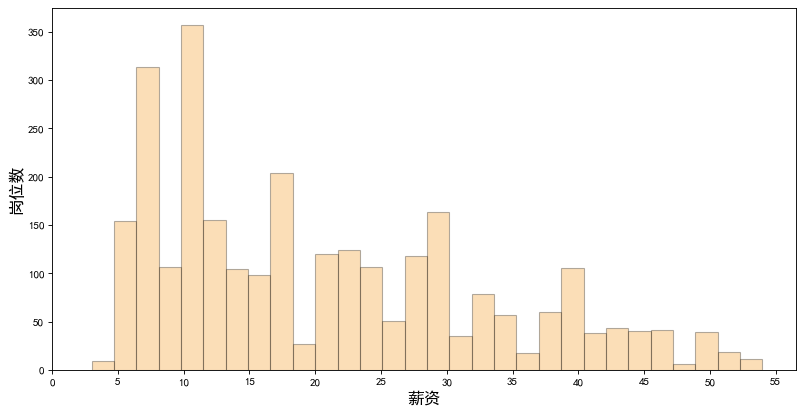

In [42]:
fig=plt.figure(figsize=(12,6),dpi=80)
plt.hist(df['avg_salary'],bins=30,color="#f59311",alpha=0.3,edgecolor='k')
plt.ylabel('岗位数',fontsize=15)
plt.xlabel('薪资',fontsize=15)
plt.xticks(list(range(0,60,5)))
plt.show()

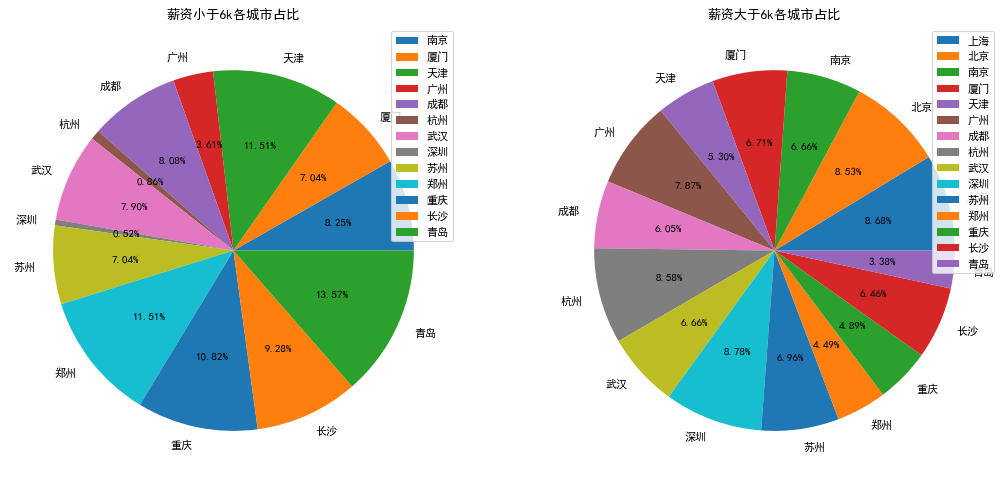

In [43]:
plt.figure(figsize=(16,16),dpi=80)
plt.subplot(121)
temp = df[df.avg_salary<10].groupby('address').avg_salary.count()
plt.pie(temp,labels=temp.index,autopct='%.2f%%')
plt.legend()
plt.title('薪资小于6k各城市占比')
plt.subplot(122)
temp = df[df.avg_salary>10].groupby('address').avg_salary.count()
plt.pie(temp,labels=temp.index,autopct='%.2f%%')
plt.title('薪资大于6k各城市占比')
plt.legend()

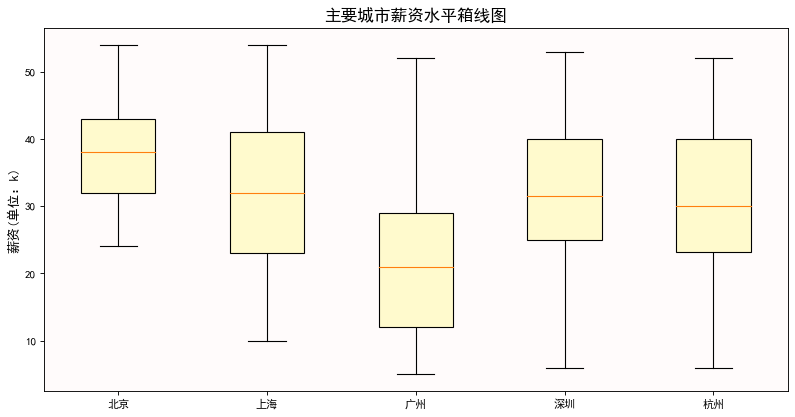

In [44]:
data1=df[df.address=='北京']['avg_salary']
data2=df[df.address=='上海']['avg_salary']
data3=df[df.address=='广州']['avg_salary']
data4=df[df.address=='深圳']['avg_salary']
data5=df[df.address=='杭州']['avg_salary']

plt.figure(figsize=(12,6),dpi=80)
plt.boxplot([data1,data2,data3,data4,data5],labels=['北京','上海','广州','深圳','杭州'], 
            flierprops={'marker':'o','markerfacecolor':'r','color':'k'},
            patch_artist=True,boxprops={'color':'k','facecolor':'#FFFACD'})
ax=plt.gca()
ax.patch.set_facecolor('#FFFAFA')
ax.patch.set_alpha(0.8)
plt.title('主要城市薪资水平箱线图',fontsize=15)
plt.ylabel('薪资(单位：k)',fontsize=12)
plt.show()

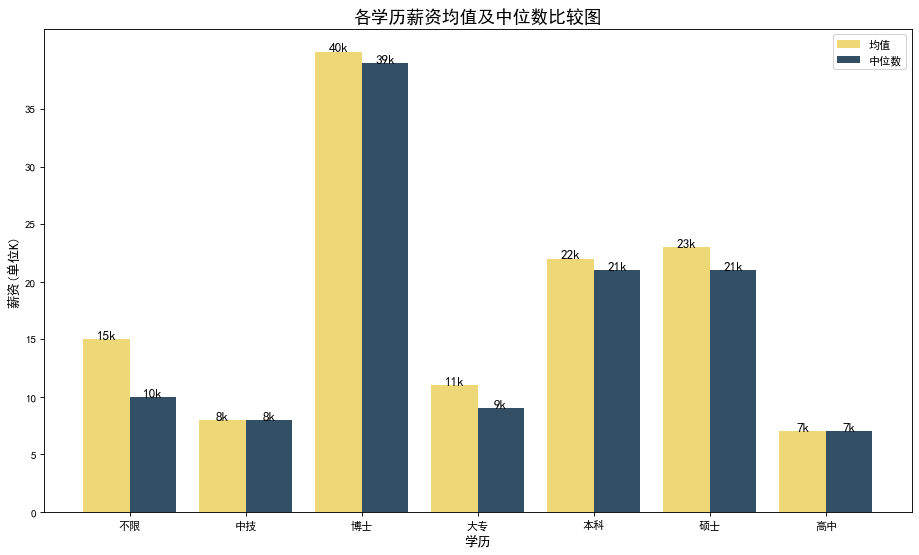

In [45]:
d = df['avg_salary'].groupby(df['diploma'])
d_avg = d.mean()
c = list(d_avg.index)
v = list(range(1,len(c)+1))
w = d_avg.values.astype('int64')
x = d.median().values.astype('int64')
move = 0.4
plt.figure(figsize=(14,8),dpi=80)
plt.bar(v,w,width=move,color='#eed777')
plt.bar([i+move for i in v],x,width=move,color='#334f65')
a = np.arange(0,7)+1.2
plt.xticks(a,c)
plt.yticks(list(range(0,40,5)))
plt.legend(['均值','中位数'])
plt.title('各学历薪资均值及中位数比较图',fontsize=16)
plt.xlabel('学历',fontsize = 12)
plt.ylabel('薪资(单位K)',fontsize = 12)
for e,f in zip(v,w):
    plt.text(e,f,'{}k'.format(f),ha='center',fontsize=12)
for g,h in zip([i+move for i in v],x):
    plt.text(g,h,'{}k'.format(h),ha='center',fontsize=12)
plt.show()


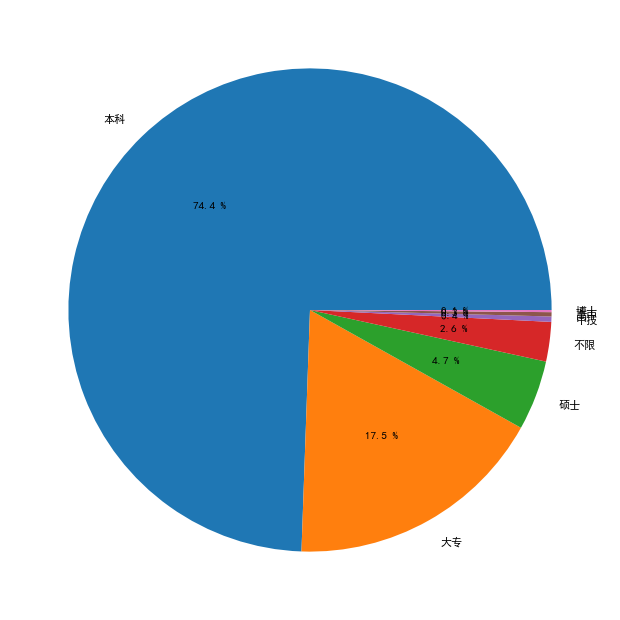

In [46]:
data = df['diploma'].value_counts()
y=data.values
plt.figure(figsize=(10,10),dpi=80)
plt.pie(y,labels=data.index,autopct='%.1f %%')
plt.show()

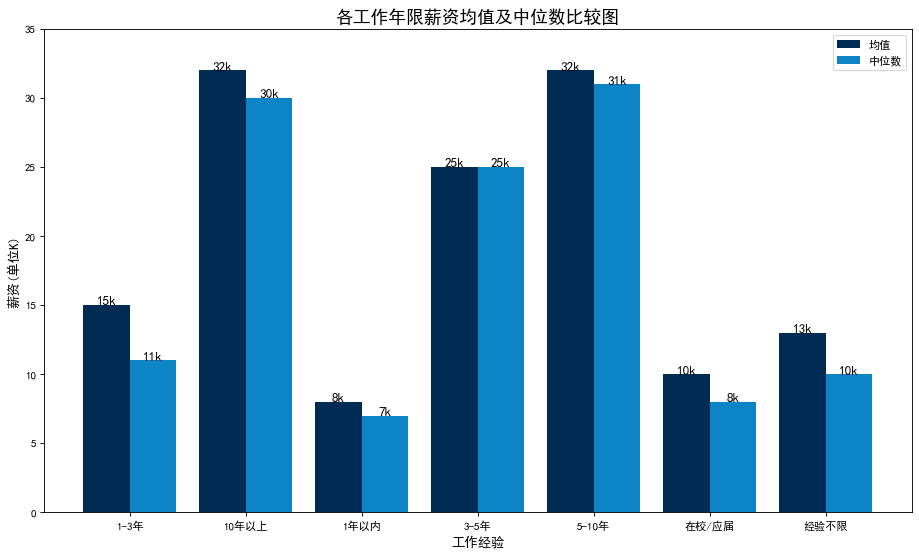

In [47]:
d = df['avg_salary'].groupby(df['experience'])
d_avg = d.mean()
c = list(d_avg.index)
v = list(range(1,len(c)+1))
w = d_avg.values.astype('int64')
x = d.median().values.astype('int64')
move = 0.4
plt.figure(figsize=(14,8),dpi=80)
plt.bar(v,w,width=move,color='#002c53')
plt.bar([i+move for i in v],x,width=move,color='#0c84c6')
a = np.arange(0,7)+1.2
plt.xticks(a,c)
plt.yticks(list(range(0,40,5)))
plt.legend(['均值','中位数'])
plt.title('各工作年限薪资均值及中位数比较图',fontsize=16)
plt.xlabel('工作经验',fontsize = 12)
plt.ylabel('薪资(单位K)',fontsize = 12)
for e,f in zip(v,w):
    plt.text(e,f,'{}k'.format(f),ha='center',fontsize=12)
for g,h in zip([i+move for i in v],x):
    plt.text(g,h,'{}k'.format(h),ha='center',fontsize=12)
plt.show()

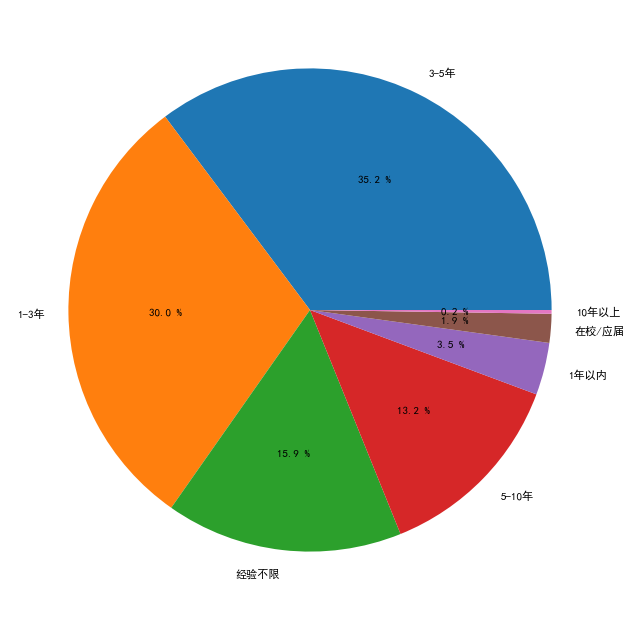

In [48]:
data = df['experience'].value_counts()
y=data.values
plt.figure(figsize=(10,10),dpi=80)
plt.pie(y,labels=data.index,autopct='%.1f %%')
plt.show()

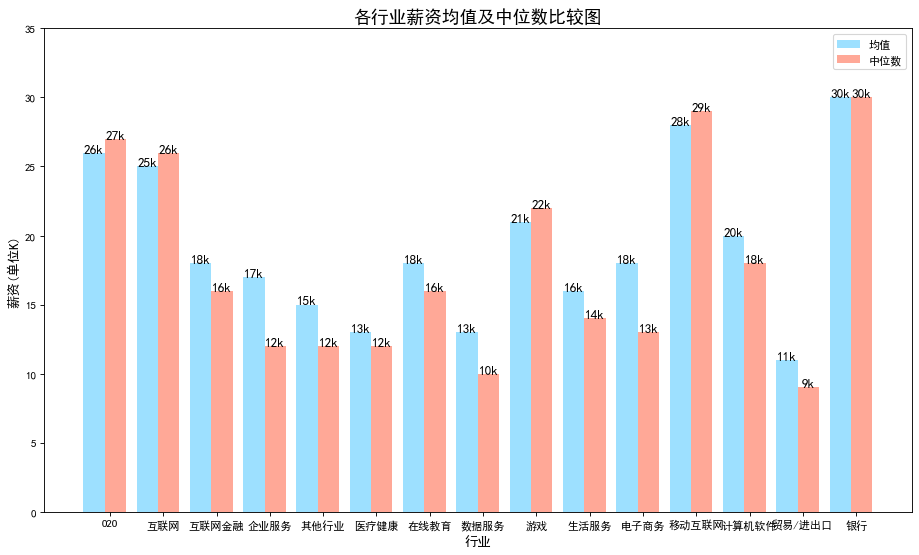

In [49]:
d = df['avg_salary'].groupby(df['lables'])
d_avg = d.mean()
c = list(d_avg.index)
v = list(range(1,len(c)+1))
w = d_avg.values.astype('int64')
x = d.median().values.astype('int64')
move = 0.4
plt.figure(figsize=(14,8),dpi=80)
plt.bar(v,w,width=move,color='#9de0ff')
plt.bar([i+move for i in v],x,width=move,color='#ffa897')
a = np.arange(0,15)+1.3
plt.xticks(a,c)
plt.yticks(list(range(0,40,5)))
plt.legend(['均值','中位数'])
plt.title('各行业薪资均值及中位数比较图',fontsize=16)
plt.xlabel('行业',fontsize = 12)
plt.ylabel('薪资(单位K)',fontsize = 12)
for e,f in zip(v,w):
    plt.text(e,f,'{}k'.format(f),ha='center',fontsize=12)
for g,h in zip([i+move for i in v],x):
    plt.text(g,h,'{}k'.format(h),ha='center',fontsize=12)
plt.show()

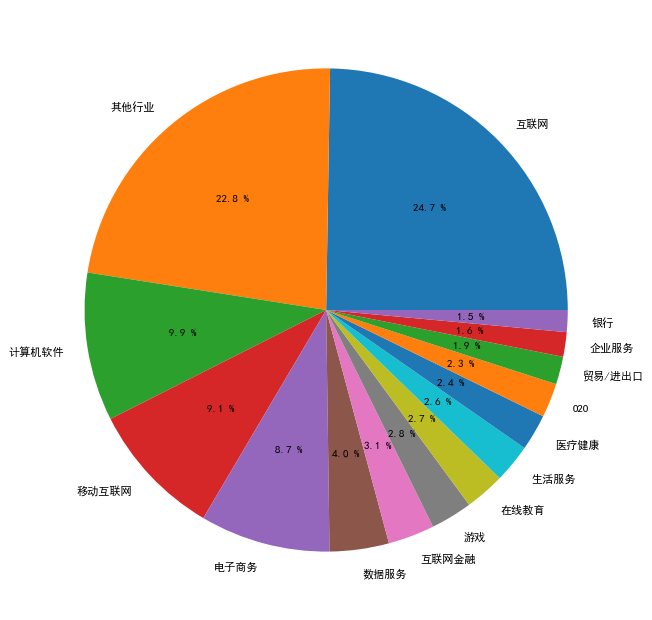

In [50]:
data = df['lables'].value_counts()
y=data.values
plt.figure(figsize=(10,10),dpi=80)
plt.pie(y,labels=data.index,autopct='%.1f %%')
plt.show()